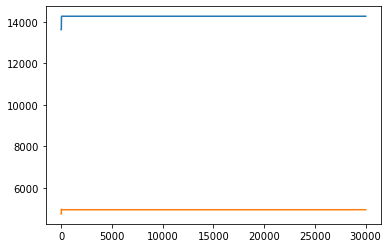

In [4]:
# ## Algoritmos Genéticos: Problema de la Mochila
#
# Siguiendo los pasos de la teoria de Algoritmos Genéticos, has el algoritmo del problema de la mochila.
#
# - Población Inicial: 20
# - Número de Genes: 20
# - Probabilidad de Cruce: 0.9
# - Probabilidad de Mutación: 0.1
# - Peso Maximo = 2500


import numpy as np
import random
import pickle
import matplotlib.pyplot as plt

n_genes = 40
peso_max = 5000
n_poblacion = 20
p_mutacion = 0.1
p_cruce = 0.9

# nombres = [f"objeto_{i}" for i in range(n_genes)]
# pesos = [random.randint(100, 400) for i in range(n_genes)]
# valores = [random.randint(500, 800) for i in range(n_genes)]

# diccionario = {}

# diccionario["nombres"] = tuple(nombres)
# diccionario["valores"] = tuple(valores)
# diccionario["pesos"] = tuple(pesos)

# with open(r"C:\Users\UsuarioM\Downloads\algoritmo_genetico.pkl", "bw") as file:
#     pickle.dump(diccionario, file)


with open(r"C:\Users\UsuarioM\Downloads\algoritmo_genetico.pkl", "br") as file:
    diccionario = pickle.load(file)
    nombres = diccionario['nombres']
    valores = diccionario['valores']
    pesos = diccionario['pesos']

individuo = [random.randint(0, 1) for i in range(n_genes)]


def inicializar_poblacion(n_poblacion, n_genes, peso_max, pesos):
    poblacion = list()

    while len(poblacion) < n_poblacion:
        individuo = [random.randint(0, 1) for i in range(n_genes)]

        peso_individuo = np.dot(individuo, pesos)

        if peso_individuo <= peso_max:
            poblacion.append(individuo)
    return poblacion


poblacion = inicializar_poblacion(n_poblacion, n_genes, peso_max, pesos)


# ## Método de selección, por torneo


numero_elementos = 3


lista_seleccionados = random.sample(poblacion, k=numero_elementos)
lista_seleccionados

indice = np.argmax([np.dot(individuo, valores)
                   for individuo in lista_seleccionados])
lista_seleccionados[indice]


def torneo_padres(poblacion, numero_elementos):
    padres = []
    for i in range(2):
        lista_seleccionados = random.sample(poblacion, k=numero_elementos)
        indice = np.argmax([np.dot(individuo, valores)
                           for individuo in lista_seleccionados])
        padres.append(lista_seleccionados[indice])

    return padres


padre_1, padre_2 = torneo_padres(poblacion, numero_elementos)


# ## Cruzamiento


def peso_hijo(hijo, pesos=pesos):

    peso = np.dot(hijo, pesos)
    return peso


# 2 padres, dos hijos.
# Dividir padres de forma aleatoria, unir p1 padre 1 con p2 padre 2, unir p1 padre 2 con p2 padre 1

def cruce(padre_1, padre_2, n_genes, peso_max, n_iteraciones=0):
    if random.random() < p_cruce:

        peso_inicial_hijo = peso_max + 1

        while peso_inicial_hijo > peso_max and n_iteraciones < 1000:

            k = random.randint(1, n_genes - 2)

            hijo = padre_1[:k] + padre_2[k:]

            peso_inicial_hijo = peso_hijo(hijo)

        return hijo

    fitness_padre1 = np.dot(padre_1, valores)
    fitness_padre2 = np.dot(padre_2, valores)

    if fitness_padre1 > fitness_padre2:
        return padre_1
    else:
        return padre_2


hijo_1, hijo_2 = cruce(padre_1, padre_2, n_genes, peso_max), cruce(
    padre_1, padre_2, n_genes, peso_max)


# Mutación

def mutacion(hijo, n_genes, peso_max, p_mutacion, n_iteraciones=0):

    if random.random() < p_mutacion:

        peso_mutado = peso_max + 1

        while peso_mutado > peso_max and n_iteraciones < 1000:
            hijo_mutado = hijo.copy()
            k = random.randint(0, n_genes - 1)
            gen = hijo_mutado[k]
            if gen == 0:
                hijo_mutado[k] = 1
            elif gen == 1:
                hijo_mutado[k] = 0
            n_iteraciones += 1

            peso_mutado = np.dot(hijo_mutado, pesos)

        return hijo_mutado
    return hijo


hijo_1 = mutacion(hijo_1, n_genes, peso_max, p_mutacion)

hijo_2 = mutacion(hijo_2, n_genes, peso_max, p_mutacion)


# Reemplazo

def reemplazamiento(hijo, poblacion):
    fitness_poblacion = np.dot(poblacion, valores)
    minimo_valor_poblacion = min(fitness_poblacion)

    valor_hijo = np.dot(hijo, valores)

    if valor_hijo > minimo_valor_poblacion:
        indice_menor = np.argmin(fitness_poblacion)
        # print(indice_menor)
        poblacion[indice_menor] = hijo
    return poblacion


poblacion = reemplazamiento(hijo_1, poblacion)
poblacion = reemplazamiento(hijo_2, poblacion)


def mochila(poblacion, numero_elementos, valores, n_iteraciones):
    # Mejores de cada población
    mejor_poblacion = []

    for i in range(n_iteraciones):

        # Seleccionar padres (conseguimos padre 1 y 2)
        padre_1, padre_2 = torneo_padres(poblacion, numero_elementos)
        # Cruce (conseguimos hijo 1 y 2)
        hijo_1, hijo_2 = cruce(padre_1, padre_2, n_genes, peso_max), cruce(
            padre_1, padre_2, n_genes, peso_max)
        # Mutación?
        hijo_1, hijo_2 = mutacion(hijo_1, n_genes, peso_max, p_mutacion), mutacion(
            hijo_2, n_genes, peso_max, p_mutacion)
        # Reemplazo
        poblacion = reemplazamiento(hijo_1, poblacion)
        poblacion = reemplazamiento(hijo_2, poblacion)

        # Guardamos cada vez el mejor individuo de la población

        fitness_poblacion = np.dot(poblacion, valores)
        indice_mayor = np.argmax(fitness_poblacion)
        mejor_poblacion.append(poblacion[indice_mayor])

    return mejor_poblacion


resultado = mochila(poblacion, numero_elementos, valores, 30000)

plt.plot(np.dot(resultado, valores))
plt.plot(np.dot(resultado, pesos))
plt.show()
